# Amazon Echo Customers Sentiment Analysis

In [55]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

conda install -c https://conda.anaconda.org/conda-forge wordcloud
import wordcloud

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

import nltk # Natural Language tool kit 
nltk.download('stopwords')

from nltk.corpus import stopwords

# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/onuralpguvercin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#import data
# Apply the describe method to get statistical summary
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


There no null value in data

In [16]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<AxesSubplot:xlabel='rating', ylabel='count'>

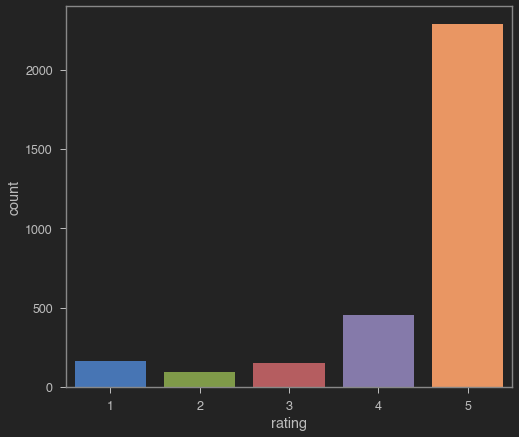

In [17]:
# Plot the count plot for the ratings
sns.countplot(x=reviews_df['rating'])

In [18]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

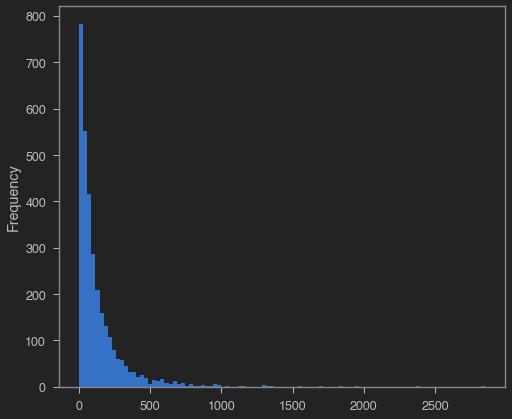

In [19]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [20]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<AxesSubplot:xlabel='feedback', ylabel='count'>

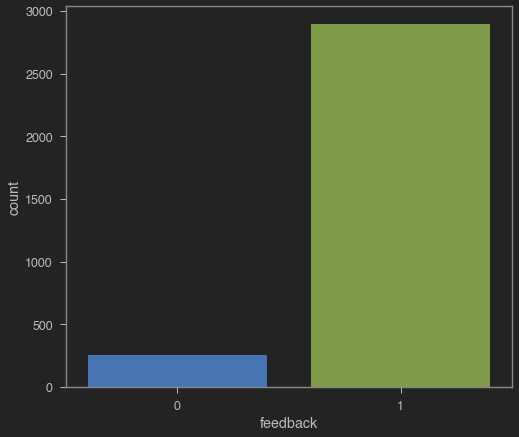

In [21]:
# Plot the countplot for feedback
sns.countplot(x=reviews_df['feedback'])

# Plotting Wordcloud

In [22]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [23]:
# Obtain only the negative reviews
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [24]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [25]:
# Join all reviews into one large string
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

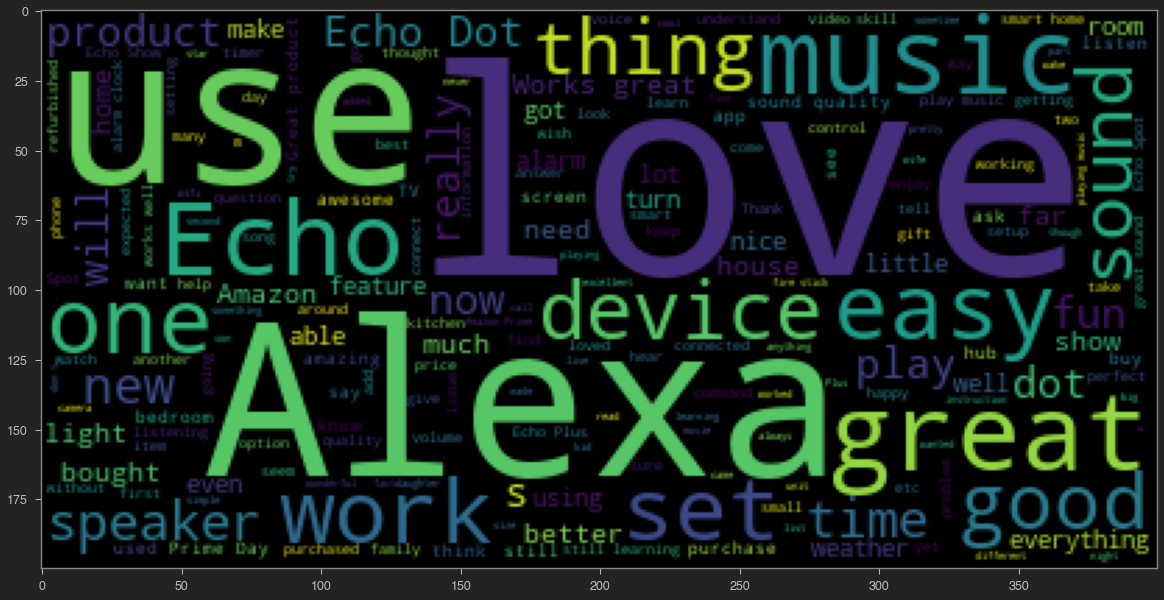

In [26]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [27]:
sentences = negative['verified_reviews'].to_list()
len(sentences)

257

In [28]:
# Join all reviews into one large string
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

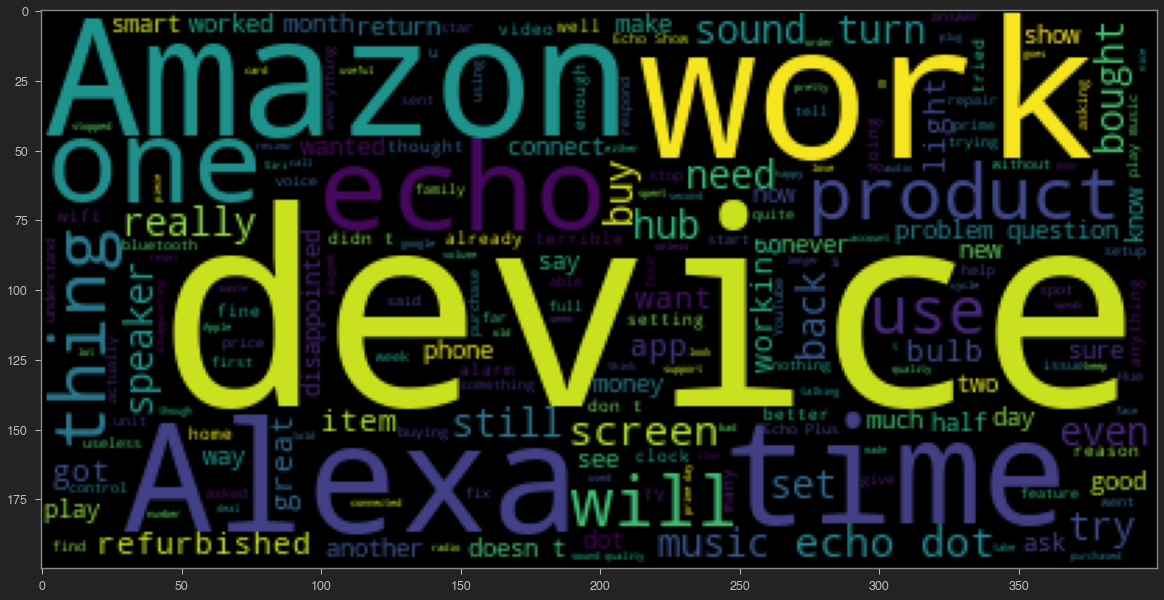

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# Data Cleaning

In [56]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [57]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(cleaning)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline
vectorizer = CountVectorizer(analyzer = cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [62]:
vectorizer.get_feature_names()

['072318',
 '1',
 '10',
 '100',
 '1000',
 '100X',
 '1010',
 '1030pm',
 '11',
 '1100sf',
 '1220',
 '129',
 '12am',
 '15',
 '150',
 '19',
 '1964',
 '1990s',
 '1990’s',
 '1GB',
 '1rst',
 '1st',
 '2',
 '20',
 '200',
 '2000',
 '2017',
 '2030',
 '229',
 '23',
 '2448',
 '247',
 '24GHZ',
 '24ghz',
 '25',
 '29',
 '299',
 '2999',
 '2Original',
 '2nd',
 '2or',
 '2package',
 '3',
 '30',
 '300',
 '30so',
 '334',
 '34',
 '342nd',
 '3434',
 '34A34',
 '34Alexa',
 '34Alexa34',
 '34Certified',
 '34Computer34',
 '34Dot34',
 '34Drop',
 '34First',
 '34Hub',
 '34I',
 '34Im',
 '34NEVER',
 '34Philips',
 '34Play',
 '34Second',
 '34Skills34',
 '34Tell',
 '34The',
 '34Things',
 '34Thongs',
 '34Try',
 '34Whats',
 '34alexa34',
 '34card34',
 '34cycle',
 '34cycle34',
 '34fixes34',
 '34fun34',
 '34group34',
 '34hear34',
 '34hmm',
 '34hmmm',
 '34it34',
 '34late',
 '34learn',
 '34light34',
 '34lights34',
 '34listen34',
 '34minor',
 '34outlet34',
 '34personal34',
 '34she34',
 '34show',
 '34smart',
 '34smart34',
 '34sorr

In [63]:
reviews_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
reviews_countvectorizer.shape

(3150, 5211)

In [67]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
y = reviews_df['feedback']

# Train Model

Naive Bayes Classifier

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

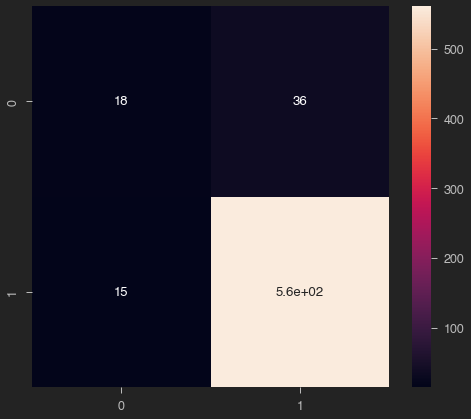

In [77]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [78]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        54
           1       0.94      0.97      0.96       576

    accuracy                           0.92       630
   macro avg       0.74      0.65      0.69       630
weighted avg       0.91      0.92      0.91       630



Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<AxesSubplot:>

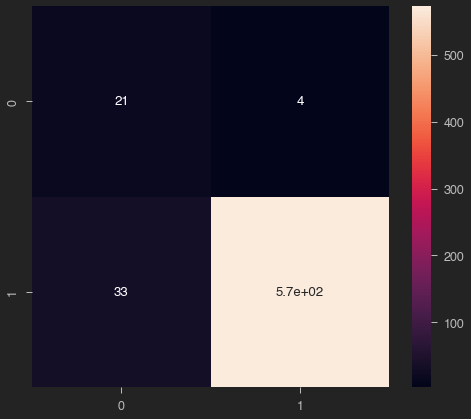

In [81]:
# Predicting the Test set results
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.39      0.53        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.89      0.69      0.75       630
weighted avg       0.94      0.94      0.93       630



Gradient Boosting Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)



GradientBoostingClassifier()

<AxesSubplot:>

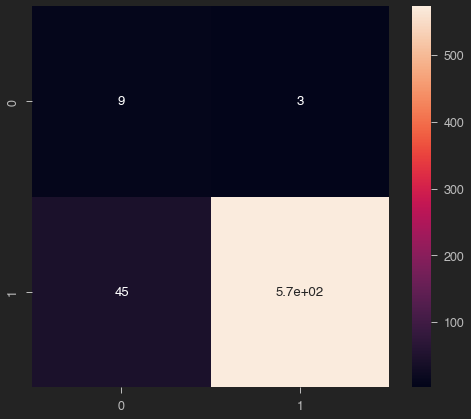

In [84]:
# Predicting the Test set results
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.17      0.27        54
           1       0.93      0.99      0.96       576

    accuracy                           0.92       630
   macro avg       0.84      0.58      0.62       630
weighted avg       0.91      0.92      0.90       630

